In [1]:
import birdvoxpaint as bvp
import librosa
import numpy as np
import os

In [2]:
wav_path = os.path.join(
    "/Users", "vl238", "Box Sync",
    "BOGOTA_NFCs_2018", "MonserrateNFCs",
    "SWIFT_20181106_235545.wav")

sr = librosa.get_samplerate(wav_path)

In [3]:
X = bvp.transform(
        wav_path,
        indices=[bvp.acoustic_complexity_index, bvp.entropy_based_concentration, bvp.acoustic_event_count])

20it [00:06,  3.12it/s]


In [45]:
X.shape

(3, 1025, 20)

In [57]:
import sklearn


X_dict = {}
X_dict[wav_path] = X
X_dict[wav_path[:-4] + "_bis.wav"] = np.concatenate((X, X), axis=-1)

X_keys = list(X_dict.keys())
n_features = X_dict[X_keys[0]].shape[0]
n_freqs = X_dict[X_keys[0]].shape[1]

running_min = np.inf
running_max = -np.inf

for key in X_keys:
    X_value = X_dict[key]
    assert X_value.shape[0] == n_features
    assert X_value.shape[1] == n_freqs
    X_value = X_value.reshape((n_features, -1))
    current_min = np.min(X_value, axis=1)
    running_min = np.minimum(running_min, current_min)
    current_max = np.max(X_value, axis=1)
    running_max = np.maximum(running_max, current_max)

In [59]:
running_min

array([0.09317533, 0.09317533, 0.09317533])

In [4]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

def rgbshow(
        data, x_coords=None, y_coords=None,
        sr=22050, segment_duration=10,
        fmin=None, fmax=None, ax=None,
        **kwargs):
    data = np.clip(data, 0, 1)
    
    kwargs.setdefault('rasterized', True)
    kwargs.setdefault('edgecolors', 'None')
    kwargs.setdefault('shading', 'flat')
    
    all_params = dict(kwargs=kwargs,
                  sr=sr/1000,
                  fmin=fmin,
                  fmax=fmax,
                  hop_length=sr/1000*segment_duration)
    
    # Get the x and y coordinates
    y_axis = 'hz'
    y_coords = librosa.display.__mesh_coords(
        y_axis, y_coords, data.shape[0], **all_params)
    x_axis = 'time'
    x_coords = librosa.display.__mesh_coords(
        x_axis, x_coords, data.shape[1], **all_params)
    
    color_tuples = np.array([
        data[:, :, 0].flatten(),
        data[:, :, 1].flatten(),
        data[:, :, 2].flatten()]).transpose()

    axes = librosa.display.__check_axes(ax)
    out = axes.pcolormesh(x_coords, y_coords, data[:, :, 0], color=color_tuples, **kwargs)
    librosa.display.__set_current_image(ax, out)

    axes.set_xlim(x_coords.min(), x_coords.max())
    axes.set_ylim(y_coords.min(), y_coords.max())

    # Set up axis scaling
    librosa.display.__scale_axes(axes, x_axis, 'x')
    librosa.display.__scale_axes(axes, y_axis, 'y')

    # Construct tickers and locators
    librosa.display.__decorate_axis(axes.xaxis, x_axis)
    last_xtick = plt.xticks()[0][-1]
    if last_xtick<60:
        axes.xaxis.set_label_text('Time (s)')
    elif last_xtick<3600:
        axes.xaxis.set_label_text('Time (mm:ss)')
    else:
        axes.xaxis.set_label_text('Time (hh:mm:ss)')
    librosa.display.__decorate_axis(axes.yaxis, y_axis)
    axes.yaxis.set_label_text('Frequency (kHz)')

    
    return axes

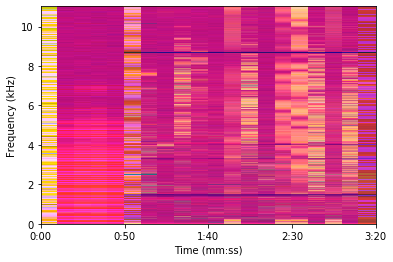

In [5]:
rgbshow(X)

0.6000000000000001

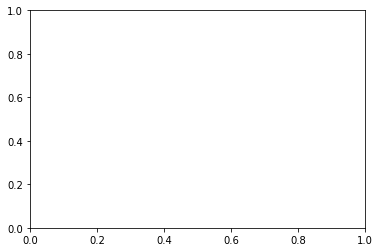

In [131]:
plt.xticks()[0][3]

In [ ]:
X.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


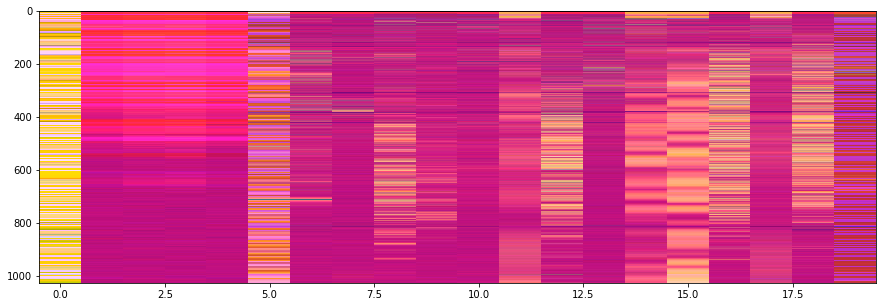

In [4]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.imshow(X, aspect="auto")

In [10]:
X.shape

(1025, 20, 3)

In [6]:
flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [8]:
np.zeros((3, 4)).flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

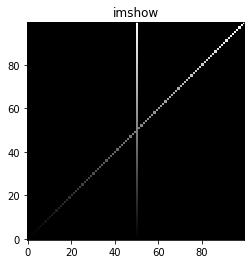

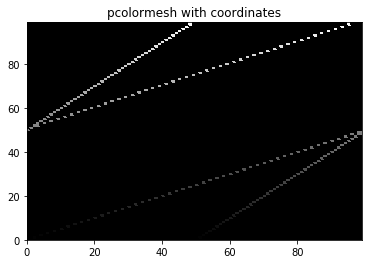

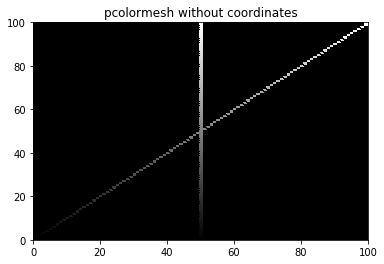

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Define coordinate arrays
N = 100
x = np.arange(N)
y = np.arange(N)
x, y = np.meshgrid(x, y)

# Define RGB arrays
r = np.zeros(x.shape)
g = np.zeros(x.shape)
b = np.zeros(x.shape)

# ... brush along the diagonal
r[range(N), range(N)] = np.linspace(0, 1, N)
g[range(N), range(N)] = np.linspace(0, 1, N)
b[range(N), range(N)] = np.linspace(0, 1, N)

# ... brush vertically
r[:, N//2] = np.linspace(0, 1, N)
g[:, N//2] = np.linspace(0, 1, N)
b[:, N//2] = np.linspace(0, 1, N)

# ... Stack them
rgb = np.dstack([r, g, b])

# Reshape as list of rgb tuples
color_tuples = np.array([r.flatten(), g.flatten(), b.flatten()]).transpose()

# Plot using imshow
plt.figure()
plt.imshow(rgb, origin='lower', interpolation='none')
plt.title('imshow')

# Plot using pcolormesh (with coordinates)
plt.figure()
im = plt.pcolormesh(x, y, r, color=color_tuples)
im.set_array(None)
plt.title('pcolormesh with coordinates')

# Plot using pcolormesh (without coordinates)
plt.figure()
im = plt.pcolormesh(r, color=color_tuples)
im.set_array(None)
plt.title('pcolormesh without coordinates')

plt.show()

In [45]:
color_tuples.shape

(10000, 3)

In [46]:
r.shape

(100, 100)